## Tensors
Tensors are a specialized data structure that are very similar to arrays and matrices. In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.[1]


Tensors are similar to NumPy’s ndarrays, except that tensors can run on GPUs or other hardware accelerators.

[1]https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html#:~:text=Tensors%20are%20a%20specialized%20data,GPUs%20or%20other%20hardware%20accelerators.

## install PyTorch with Conda

1) Open a Terminal or Anaconda Prompt

2) Create a new environment 

```
conda create -n new_env python=3.9

```
3) Activate the environment
```
conda activate new_env
```

4) Install PyTorch

```
CPU-only
conda install pytorch torchvision torchaudio cpuonly -c pytorch

GPU support with CUDA

conda install pytorch torchvision torchaudio cudatoolkit=11.7 -c pytorch

```
4-1) pip install panda
5) Verify the installation

```
python
>>> import torch
>>> print(torch.__version__)
>>> print(torch.cuda.is_available())



```

In [1]:
import torch
if torch.cuda.is_available():
    print(f"Number of CUDA devices: {torch.cuda.device_count()}")
    print(f"Current device: {torch.cuda.current_device()}")
    print(f"Device name: {torch.cuda.get_device_name(torch.cuda.current_device())}")
else:
    print("fail")

fail


### Creating a Random Integer Tensor
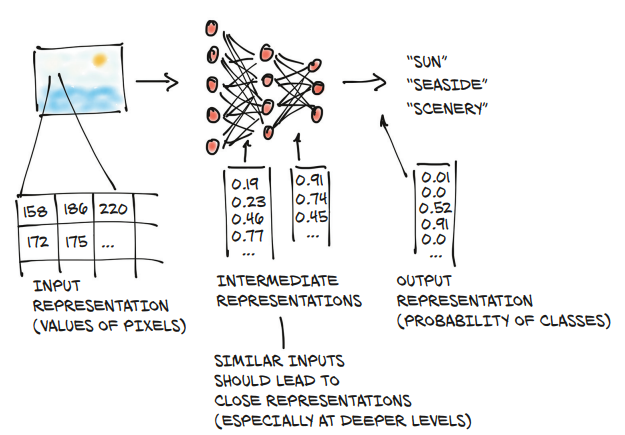


## Tensors in Deep Neural Networks

- **Deep Neural Networks** transform input data into output predictions in stages, creating **intermediate representations** at each step.
  - Early layers may detect simple patterns like edges or textures.
  - Deeper layers capture complex structures, such as parts of objects (e.g., eyes, noses).
  
- **Intermediate Representations**:
  - These are floating-point numbers that describe the structure of the input data.
  - They are unique to each task and learned from relevant examples.
  - Similar inputs should produce similar representations, especially in deeper layers.

- **Tensors in PyTorch**:
  - Tensors are the core data structure in PyTorch, used to represent inputs, intermediate representations, and outputs.
  - They generalize vectors and matrices to multiple dimensions and are essentially **multidimensional arrays**.
  - Understanding tensors and how PyTorch handles data is crucial for deep learning workflows.


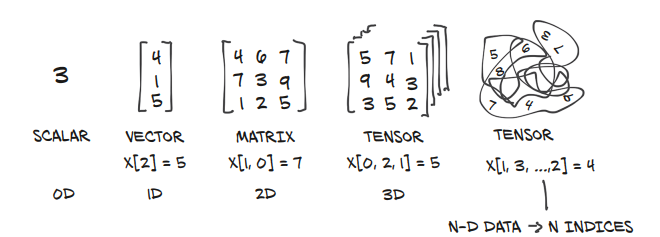

**`Similar inputs should result in similar intermediate representations, especially at deeper layers. This is why neural networks can generalize well to unseen data`**

torch.randint generates a tensor with random integer values.

In [2]:
#                      (lower bound, upper band, shape)
import torch
randint = torch.randint(-100,100,(6,2))
randint

tensor([[  6,  35],
        [-68,   6],
        [ 96, -45],
        [ 12,  76],
        [ 83,  28],
        [ 34,  48]])

### Creating a Custom Tensor
torch.tensor creates a tensor from a given list of lists

In [3]:
tensor = torch.tensor([[0.1,1.2],[2.2,2.3],[4.9,5.2]])
tensor

tensor([[0.1000, 1.2000],
        [2.2000, 2.3000],
        [4.9000, 5.2000]])

### Creating a Tensor of Zeros
torch.zeros generates a tensor filled with zeros.

In [4]:
zeros= torch.zeros(2,3)
zeros

tensor([[0., 0., 0.],
        [0., 0., 0.]])

### Creating a Tensor of Ones
torch.ones creates a tensor filled with ones.


In [5]:
ones = torch.ones(3,4)
ones

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

### Creating an Uninitialized Tensor
torch.empty creates a tensor with uninitialized values.

In [6]:
input = torch.empty(2,3)
input

tensor([[0., 0., 0.],
        [0., 0., 0.]])

### Creating a Tensor with a Range of Values


In [9]:
arange = torch.arange(3)
arange

tensor([0, 1, 2])

### Storage
In PyTorch, storage is a low-level mechanism that provides a contiguous block of memory to store the data underlying a tensor. This storage is shared by tensors derived from the same data

In [10]:
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
points_storage = points.storage()
points_storage[0] = 2.0
points_storage[2] = -2.0
print(points)

tensor([[ 2.,  1.],
        [-2.,  3.],
        [ 2.,  1.]])


/var/folders/s0/rxtnxr8j7vgdhjdkrvn5nbhc0000gn/T/ipykernel_67950/38647653.py:2: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  points_storage = points.storage()


### clone
The .clone() method creates a deep copy of a PyTorch tensor.

In [11]:
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
second_point = points[1].clone()
second_point[0] = 10.0
points

tensor([[4., 1.],
        [5., 3.],
        [2., 1.]])

### Data Types
- torch.float32 or torch.float: 32-bit floating-point
- torch.float64 or torch.double: 64-bit, double-precision floating-point
- torch.float16 or torch.half: 16-bit, half-precision floating-point
- torch.int8: signed 8-bit integers
- torch.uint8: unsigned 8-bit integers
- torch.int16 or torch.short: signed 16-bit integers
- torch.int32 or torch.int: signed 32-bit integers
- torch.int64 or torch.long: signed 64-bit integers
- torch.bool: Boolean

In [12]:
float_tensor = torch.tensor([1.0, 2.0, 3.0], dtype=torch.float32)
int_tensor = torch.tensor([1, 2, 3], dtype=torch.int32)
int_tensor

tensor([1, 2, 3], dtype=torch.int32)

Tensor Shapes and Dimensions

In [13]:
print(points.shape)  # Output: torch.Size([3, 2])


torch.Size([3, 2])


### Random Initialization 

Reproducibility:

- It ensures that experiments can be replicated with the same results.

- Essential for debugging, research, and sharing reproducible results.

Consistency Across Runs:

- Without setting the seed, random operations will produce different results on every run.


In [14]:
torch.manual_seed(42)
random_tensor = torch.randint(0, 10, (2, 2))
random_tensor

tensor([[2, 7],
        [6, 4]])

## Save and load

In [7]:
import os
import torch
import numpy as np

# Ensure the output directory exists
os.makedirs('../data/p1ch3', exist_ok=True)

# Create a NumPy array as the source
points_np = np.array([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])

# Convert the NumPy array to a PyTorch tensor
points = torch.from_numpy(points_np)

# Save the tensor using torch.save (direct file path)
torch.save(points, '../data/p1ch3/ourpoints.t')

# Save the tensor using a file object in write-binary mode
with open('../data/p1ch3/ourpoints.t', 'wb') as f:
    torch.save(points, f)

# Load the tensor directly from the file path
loaded_points_direct = torch.load('../data/p1ch3/ourpoints.t')

# Load the tensor using a file object in read-binary mode
with open('../data/p1ch3/ourpoints.t', 'rb') as f:
    loaded_points_from_file = torch.load(f)

# Print results to verify
print("Original Points Tensor:\n", points)
print("Loaded Points (Direct):\n", loaded_points_direct)
print("Loaded Points (From File):\n", loaded_points_from_file)


Original Points Tensor:
 tensor([[4., 1.],
        [5., 3.],
        [2., 1.]], dtype=torch.float64)
Loaded Points (Direct):
 tensor([[4., 1.],
        [5., 3.],
        [2., 1.]], dtype=torch.float64)
Loaded Points (From File):
 tensor([[4., 1.],
        [5., 3.],
        [2., 1.]], dtype=torch.float64)


### Creating Tensors with Linearly Spaced Values
torch.linspace generates a 1D tensor with linearly spaced values between a specified start and end.

In [14]:
linspace = torch.linspace(3,10,steps = 5)
linspace

tensor([ 3.0000,  4.7500,  6.5000,  8.2500, 10.0000])

###  Creating Tensors with Logarithmically Spaced Values
torch.logspace creates a 1D tensor with values spaced evenly on a logarithmic scale.
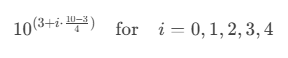

In [15]:
logspace = torch.logspace(3,10,steps = 5)
logspace

tensor([1.0000e+03, 5.6234e+04, 3.1623e+06, 1.7783e+08, 1.0000e+10])

Creating an Empty Tensor with the Same Shape and Data Type as Another Tensor

In [ ]:
empty_like = torch.empty_like(logspace)
empty_like


 Checking GPU Availability and Setting Device

In [ ]:
import numpy as np
import torch
import time
device = 'cuda' if torch.cuda.is_available() else 'cpu'

print(device)

In [ ]:
import time
import torch
start_time = time.time()

zeros= torch.zeros(1,1)

end_time = time.time()

elapsed_time = end_time - start_time

print(f"{elapsed_time:0.8f}")

- NumPy:
1) Matrix Multiplication: np.dot(A, B) or A @ B
2) Element-Wise Multiplication: A * B
- PyTorch:
1) Matrix Multiplication: torch.matmul(A, B) or A @ B
2) Element-Wise Multiplication: A * B

In [8]:
import torch
import numpy as np
import time

# Function to time matrix multiplication in PyTorch
def pytorch_matrix_multiplication(device, size=(10000, 10000)):
    torch_rand1 = torch.rand(size).to(device)
    torch_rand2 = torch.rand(size).to(device)

    start_time = time.perf_counter()
    result = torch_rand1 @ torch_rand2  # Matrix multiplication
    end_time = time.perf_counter()

    elapsed_time = end_time - start_time
    return elapsed_time

# Function to time matrix multiplication in NumPy
def numpy_matrix_multiplication(size=(10000, 10000)):
    np_rand1 = np.random.rand(*size)
    np_rand2 = np.random.rand(*size)

    start_time = time.perf_counter()
    result = np.dot(np_rand1, np_rand2)  # Matrix multiplication
    end_time = time.perf_counter()

    elapsed_time = end_time - start_time
    return elapsed_time

# Main script
if __name__ == "__main__":
    size = (10000, 10000)  # Adjust size as needed
    device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

    # Inform user about the device
    if device.type == "mps":
        print("Using GPU for PyTorch computations.")
    else:
        print("GPU not available. Using CPU for PyTorch computations.")

    # Measure PyTorch matrix multiplication time
    torch_time = pytorch_matrix_multiplication(device, size=size)
    print(f"PyTorch matrix multiplication elapsed time: {torch_time:.8f} seconds")

    # Measure NumPy matrix multiplication time
    numpy_mat_time = numpy_matrix_multiplication(size=size)
    print(f"NumPy matrix multiplication elapsed time: {numpy_mat_time:.8f} seconds")
    increase_rate = numpy_mat_time/torch_time
    print(f"Pytorch is {increase_rate:.8f} times faster than Numpy.")


Using GPU for PyTorch computations.
PyTorch matrix multiplication elapsed time: 0.31490704 seconds
NumPy matrix multiplication elapsed time: 4.54393883 seconds
Pytorch is 14.42946089 times faster than Numpy.


In [23]:
#Checking if the above is correct
p = 0.00020671
a= p*21019.7
a

4.344982187

# Class Notes:

Torch is faster core of tensorflow if more optimized than numpy

torch.cat concatenates tensors along a specified dimension.

In [ ]:
import torch
tensor = torch.tensor([1,2,3,4])
out = torch.cat((tensor,torch.tensor([5])), dim = 0)
print(out)

### Normal distribution

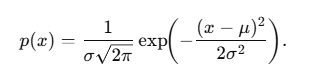

- \(\mu\) (mu) is the mean (center) of the distribution.
- \(\sigma\) (sigma) is the standard deviation (spread) of the distribution.
- \(x\) is the variable for which we want to find the probability density.

In [ ]:
import torch

# Generate data using torch.normal
w_normal = torch.normal(mean=torch.arange(1., 11.), std=0.1)




### Applying Exponential Function to the Tensor
torch.exp applies the exponential function (e^x) to each element in the tensor

e^0 = 1

e^(-inf) = 0

In [32]:
input_tensor = torch.tensor([1.0, 2.0, 3.0])
out=torch.exp(input_tensor)
out

tensor([ 2.7183,  7.3891, 20.0855])

### Transposing a Tensor
transpose swaps two dimensions of the tensor.

In [6]:
input=torch.zeros([2,3,4])
out = input.transpose(0,2)
out.shape

torch.Size([4, 3, 2])

### Transfer data and converting

torch.from_numpy() to convert.
.float() to standardize the data type.
.to(device) to ensure the data is compatible with the chosen computation device.

In [33]:
# Required imports
import torch
import numpy as np

# Simulating NumPy data (training data)
# Random x and y arrays
x_train = np.random.rand(10, 3)  # 10 samples, 3 features
y_train = np.random.rand(10, 1)  # 10 samples, 1 output

# Select the device (GPU if available, otherwise CPU)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Convert NumPy arrays to PyTorch tensors and move to the selected device
x_train_tensor = torch.from_numpy(x_train).float().to(device)
y_train_tensor = torch.from_numpy(y_train).float().to(device)

# Print the types and check the device
print("Original NumPy array type:", type(x_train))
print("Converted PyTorch tensor type:", type(x_train_tensor))
print("PyTorch tensor detailed type and device:", x_train_tensor.type())

# Quick test to verify tensor operations
# Perform a simple operation to ensure tensors are compatible with the device
result = x_train_tensor + 1
print("\nResult of adding 1 to the tensor:")
print(result)


Original NumPy array type: <class 'numpy.ndarray'>
Converted PyTorch tensor type: <class 'torch.Tensor'>
PyTorch tensor detailed type and device: torch.cuda.FloatTensor

Result of adding 1 to the tensor:
tensor([[1.2507, 1.8579, 1.8364],
        [1.8615, 1.2299, 1.3117],
        [1.7379, 1.7951, 1.5339],
        [1.0758, 1.2979, 1.5775],
        [1.7548, 1.5989, 1.9837],
        [1.4657, 1.8111, 1.5140],
        [1.3484, 1.2236, 1.7207],
        [1.5280, 1.0755, 1.5968],
        [1.7935, 1.5643, 1.9415],
        [1.7671, 1.2769, 1.3052]], device='cuda:0')


### Max and Min

In [36]:
x = torch.rand(10, 5)
print(f"x shape: {x.shape}")
x

x shape: torch.Size([10, 5])


tensor([[0.2313, 0.7083, 0.3375, 0.4991, 0.4513],
        [0.1327, 0.9712, 0.7308, 0.4881, 0.1108],
        [0.6779, 0.7389, 0.4313, 0.4807, 0.8506],
        [0.0894, 0.2798, 0.4453, 0.6603, 0.7351],
        [0.6706, 0.4147, 0.6100, 0.2058, 0.5712],
        [0.3651, 0.0384, 0.1944, 0.8883, 0.6149],
        [0.1660, 0.7318, 0.6120, 0.8859, 0.4459],
        [0.1858, 0.0224, 0.4063, 0.4088, 0.2736],
        [0.8540, 0.6277, 0.4703, 0.7348, 0.4641],
        [0.6177, 0.1028, 0.6666, 0.4866, 0.7158]])

In [35]:
#x = torch.rand(10, 5)

print(torch.argmin(x, axis=1))
print(torch.argmax(x, axis=1))


tensor([0, 1, 2, 0, 1, 1, 0, 1, 3, 3])
tensor([1, 3, 4, 4, 3, 0, 2, 4, 0, 1])


### Stacking Tensors
torch.stack joins a sequence of tensors along a new dimension.

In [37]:
tensor1 = torch.tensor([1,2,3])
tensor2 = torch.tensor([4,5,6])
tensor3 = torch.tensor([7,8,9])
stacked_tensor = torch.stack([tensor1,tensor2, tensor3], dim=0)
print(stacked_tensor)

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


### Building different chunks from a tensor

A tensor can be split into various chunks along different axes

### Class notes:
breaks the dataframe into specified chunks

In [13]:
chunks=torch.chunk(x, 2)
# Print the chunks
print("Chunks:")
for i, chunk in enumerate(chunks):
    print(f"Chunk {i+1}: {chunk.shape}")

Chunks:
Chunk 1: torch.Size([5, 5])
Chunk 2: torch.Size([5, 5])


In [12]:
chunks=torch.chunk(x,2, axis=1)
# Print the chunks
print("Chunks:")
for i, chunk in enumerate(chunks):
    print(f"Chunk {i+1}: {chunk.shape}")

Chunks:
Chunk 1: tensor([[0.0380, 0.4466, 0.4005],
        [0.7127, 0.0542, 0.4939],
        [0.4106, 0.9808, 0.7183],
        [0.3979, 0.8262, 0.9507],
        [0.7982, 0.6564, 0.3650],
        [0.5270, 0.1081, 0.9429],
        [0.3192, 0.3996, 0.4061],
        [0.6795, 0.1995, 0.8879],
        [0.6515, 0.7070, 0.7990],
        [0.9463, 0.1485, 0.4024]])
Chunk 2: tensor([[0.9512, 0.5875],
        [0.1690, 0.6389],
        [0.6864, 0.6284],
        [0.7775, 0.4797],
        [0.9579, 0.8190],
        [0.1982, 0.3125],
        [0.8543, 0.9977],
        [0.8150, 0.5414],
        [0.7864, 0.0026],
        [0.2148, 0.4166]])


### Sigmoid
The sigmoid function is a commonly used activation function in machine learning, especially in neural networks. 
* It maps any real-valued input into a range between 0 and 1

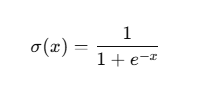

### Class Notes:
fits values into a range bt 0-1 so that the model can more efficiently learn

In [15]:
import numpy as np

def sigmoid(x):
    """
    Compute the sigmoid of x
    :param x: A scalar or numpy array of any size.
    :return: sigmoid(x)
    """
    return 1 / (1 + np.exp(-x))

    # Create a NumPy array
x_array = np.array([1.0, 2.0, 3.0, -1.0, -2.0, -3.0])

    # Apply the sigmoid function
y_array = sigmoid(x_array)

print("Input Array:", x_array)
print("Output Array:", y_array)

Input Array: [ 1.  2.  3. -1. -2. -3.]
Output Array: [0.73105858 0.88079708 0.95257413 0.26894142 0.11920292 0.04742587]


In [16]:
import torch
# Create a tensor
x_tensor = torch.tensor([1.0, 2.0, 3.0, -1.0, -2.0, -3.0])

# Apply the sigmoid function
y_tensor = torch.sigmoid(x_tensor)

print("Input Tensor:", x_tensor)
print("Output Tensor:", y_tensor)

Input Tensor: tensor([ 1.,  2.,  3., -1., -2., -3.])
Output Tensor: tensor([0.7311, 0.8808, 0.9526, 0.2689, 0.1192, 0.0474])


### softmax

The softmax function is a mathematical function used in machine learning and deep learning to convert raw scores (logits) into probabilities. 
- It is most commonly used in the output layer of a classification model, especially for multi-class classification problems

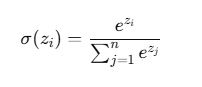

### Class Notes:
converts raw scores into probabilities. used in the output layer of a classificaiton model.

Generates probability**


In [ ]:
import numpy as np

def softmax_numpy(x):
    # Shift by the maximum to prevent overflow
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=-1, keepdims=True)

# Example usage
x = np.array([1.0, 2.0, 3.0])
print("Softmax (NumPy):", softmax_numpy(x))


In [ ]:
import torch
import torch.nn.functional as F

def softmax_pytorch(x):
    return F.softmax(x, dim=-1)

# Example usage
x = torch.tensor([1.0, 2.0, 3.0])
print("Softmax (PyTorch):", softmax_pytorch(x))


## Named tensor
Named tensors in PyTorch allow you to assign names to dimensions of a tensor for better readability and debugging. 
- They help clarify which dimensions correspond to specific concepts (e.g., batch, channel, height, width).


# Class Notes:
allows you to name each dimension for clarity and readibility instead of using the dimension num

In [9]:
import torch
_ = torch.tensor([0.2126, 0.7152, 0.0722], names=['c'])

/var/folders/s0/rxtnxr8j7vgdhjdkrvn5nbhc0000gn/T/ipykernel_1035/1646494204.py:2: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/c10/core/TensorImpl.h:1938.)
  _ = torch.tensor([0.2126, 0.7152, 0.0722], names=['c'])


In [10]:
img_t = torch.randn(3, 5, 5) # shape [channels, rows, columns] 
weights = torch.tensor([0.2126, 0.7152, 0.0722])

batch_t: A tensor representing a batch of 2 images, each with 3 channels and a 
5×5 grid

class notes:

combining the number of samples together 2 images, meaning 2 samples each with 3 dimensions, [RGB] [HEIGHT] [WIDTH]

In [11]:
batch_t = torch.randn(2, 3, 5, 5) # shape [batch, channels, rows, columns]
#notes ^ 2 samples each 3by5by5

img_t.mean(-3): Takes the mean along the channels dimension (dimension -3). For img_t of shape[3,5,5], it computes the mean across the 3 channels for each pixel, resulting in a grayscale image of shape [5,5].

In [12]:
img_gray_naive = img_t.mean(-3)
batch_gray_naive = batch_t.mean(-3)
img_gray_naive.shape, batch_gray_naive.shape

(torch.Size([5, 5]), torch.Size([2, 5, 5]))

class notes:
in python means indexing form right to left starting at the end, ex: -3 means the last 3 starting from the right and moving to the left

- unsqueeze(-1) adds a new dimension at the last axis, changing the shape to [3, 1].



In [13]:
unsqueezed_weights = weights.unsqueeze(-1).unsqueeze_(-1)


img_weights:
- img_t has a shape of [3, 5, 5]. #note: its dimension is 3x5x5 and the weight is 3x1x1
- unsqueezed_weights has a shape of [3, 1, 1].
- Broadcasting allows element-wise multiplication across the corresponding dimensions, so img_weights will have a shape of [3, 5, 5].

batch_weights:

CN: we can't perform a matrix multiplication in the 3x1x1 and the 3x5x5 because one has more dimensions than the other one

to solve this we use broadcasting which allows us to duplicate the smaller dimension multiple times until they are the same dimension

In [23]:
#MADE A MISTAKE HERE:::::????
img_weights = (img_t * unsqueezed_weights)
batch_weights = (batch_t * unsqueezed_weights)

#print(img_weights)
#print(batch_weights)

#The sum operation reduces the channels dimension (dimension -3
img_gray_weighted = img_weights.sum(-3)
batch_gray_weighted = batch_weights.sum(-3)
batch_weights.shape, batch_t.shape, unsqueezed_weights.shape

(torch.Size([2, 3, 5, 5]), torch.Size([2, 3, 5, 5]), torch.Size([3, 1, 1]))

In [25]:
img_t.shape,  unsqueezed_weights.shape

(torch.Size([3, 5, 5]), torch.Size([3, 1, 1]))

In [24]:
#Class note:
img_gray_weighted.shape,  batch_gray_weighted.shape

(torch.Size([5, 5]), torch.Size([2, 5, 5]))

This approach computes the weighted sum for grayscale conversion in a concise and efficient manner.

- ...: Matches any number of leading dimensions, allowing this code to work with both single images and batches.
- c: Refers to the channel dimension.
- h and w: Refer to the height and width dimensions.
- The notation '...chw,c->...hw' means:
    Sum over the c dimension (channels) after multiplying with the corresponding weights.

In [15]:
img_gray_weighted_fancy = torch.einsum('...chw,c->...hw', img_t, weights)
batch_gray_weighted_fancy = torch.einsum('...chw,c->...hw', batch_t, weights)
batch_gray_weighted_fancy.shape

torch.Size([2, 5, 5])

In [16]:
weights_named = torch.tensor([0.2126, 0.7152, 0.0722], names=['channels'])
weights_named

tensor([0.2126, 0.7152, 0.0722], names=('channels',))

The .refine_names function in PyTorch allows you to assign names to the dimensions of a tensor.

In [26]:
img_named =  img_t.refine_names(..., 'channels', 'rows', 'columns') #CN: first one named colums, second named rows and so on
batch_named = batch_t.refine_names(..., 'channels', 'rows', 'columns')#CN: the unnamed will be labled NONE
print("img named:", img_named.shape, img_named.names)
print()
print("batch named:", batch_named.shape, batch_named.names)
print()
print(img_named.select('channels', 0))

img named: torch.Size([3, 5, 5]) ('channels', 'rows', 'columns')

batch named: torch.Size([2, 3, 5, 5]) (None, 'channels', 'rows', 'columns')

tensor([[-2.8284,  0.2350,  0.2703, -1.4730,  1.1611],
        [-0.0608, -1.4525, -0.2844,  1.6676, -0.4092],
        [ 0.3617,  0.7395, -0.1923, -0.3694,  1.8286],
        [-0.0856,  0.1928,  0.4403, -0.4991,  1.5532],
        [-0.5553, -0.7949, -0.3334,  0.5521, -0.7702]],
       names=('rows', 'columns'))


.align_as() ensures that the tensor (weights_named) has the same order of dimensions and named axes as the target tensor (img_named). If the dimensions of weights_named are already compatible with img_named, this operation is a no-op.

Use .align_as() when:

You have two tensors with named dimensions that need to be broadcast-compatible.
You want to align the dimensions of one tensor with another for operations like addition, multiplication, etc.

In [18]:
weights_aligned = weights_named.align_as(img_named)
weights_aligned.shape, weights_aligned.names

(torch.Size([3, 1, 1]), ('channels', 'rows', 'columns'))

In [19]:
gray_named = (img_named * weights_aligned).sum('channels')
gray_named.shape, gray_named.names

(torch.Size([5, 5]), ('rows', 'columns'))

In [20]:
gray_plain = gray_named.rename(None)
gray_plain.shape, gray_plain.names

(torch.Size([5, 5]), (None, None))

## Simple neural network

Exercise: a simple neural network

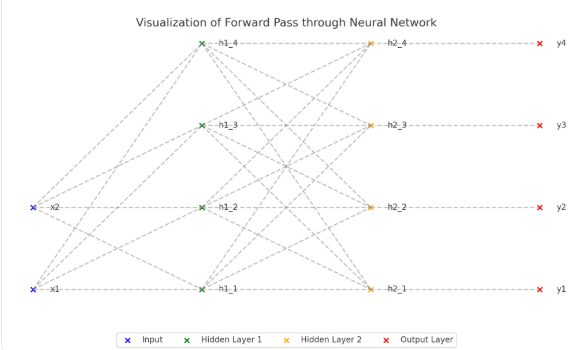

CN:
for each input there is 4 weights/ a line to each hidden layer, each hidden layer's value would be the addition producs of the weight(the line) *the input 

meaning for h1_4 = (x2 * wight/the line ) + (x1 * wight/the line)  repeated for every hidden layer, and at each end sigmoid is done and at the very end the sigmoid the highest value is the prediction

In [21]:
import torch
import torch.nn.functional as F

# Define input dimensions
input_dim = 2  # Dimension of input tensor x
hidden_dim1 = 4  # Dimension of the first hidden layer
hidden_dim2 = 4  # Dimension of the second hidden layer
batch_size = 1  # Batch size

# Define tensors with random values
x = torch.randn(batch_size, input_dim)  # Input tensor x with dimensions batch_size x input_dim
w1 = torch.randn(input_dim, hidden_dim1)  # Weight tensor w1 with dimensions input_dim x hidden_dim1
w2 = torch.randn(hidden_dim1, hidden_dim2)  # Weight tensor w2 with dimensions hidden_dim1 x hidden_dim2

# Forward pass through the network
z = torch.sigmoid(x @ w1)  # Apply sigmoid activation after first layer
y = z @ w2  # Linear transformation for the second layer
output = F.softmax(y, dim=1)  # Apply softmax to get probabilities for the second layer

# Get the predicted class index
predicted_class = torch.argmax(output, dim=1)

# Display the output and predicted class
print("Input Tensor (x):", x)
print("First Layer Output (z):", z)
print("Second Layer Output (y):", y)
print("Softmax Output:", output)
print("Predicted Class Index:", predicted_class)


Input Tensor (x): tensor([[1.0105, 1.1860]])
First Layer Output (z): tensor([[0.7267, 0.4763, 0.5405, 0.9438]])
Second Layer Output (y): tensor([[-0.0282, -1.0995,  1.0220, -0.3205]])
Softmax Output: tensor([[0.2021, 0.0692, 0.5777, 0.1509]])
Predicted Class Index: tensor([2])


what is dimension?
what is broadcasting?
How to handle dimensions?